<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>


## Trabajo Grupal Clustering - Análisis libre de un catálogo de datos 
* Cueva Castillo, Tania Piedad
* Intriago Pazmiño, María Monserrate
* Oña Erique, Victor Hugo  
* Yánez Sosapanta, David Gerardo
 


Instalar el paquete opendatasets, si no lo tiene aún. <br>pip install opendatasets</br>

In [ ]:
#Esto si se usara dataset fuente externa opendatasets
#import opendatasets as od
#od.download('https://data.europa.eu/data/datasets/covid-19-coronavirus-data-daily-up-to-14-december-2020?locale=es/')

In [ ]:
#Esto si le leyerá de la unidad Drive
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


## Descripción problema

La empresa (ficticia) “UNIR Health&Data” ha organizado un concurso público para la adjudicación de un proyecto de ciencia de datos, muy bien dotado económicamente.

In [ ]:
#Esto si le leyerá de la unidad Drive
#import pandas as pd
#df_starup = pd.read_csv(r'customer-segmentation-tutorial-in-python/Mall_Customers.csv')
#df_starup = pd.read_csv('/content/drive/MyDrive/TIA Grupal/data-casos-todo-mundo.csv')
#df_starup.head(1500)

##EMPIEZA AQUI! 
#Cargar github

In [ ]:
%matplotlib inline

#Para esta actividad se importarán las siguientes librerías:
from IPython.display import HTML
import pandas as pd
#from pandas import read_csv 
from pandas.plotting import scatter_matrix

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


## METRICAS
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
#from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.datasets import make_classification

import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
import numpy 

In [ ]:
url = "https://raw.githubusercontent.com/Taniapcc/tareaUnir/main/data-casos-todo-mundo.csv"
encoding = 'utf8'
df_starup = pd.read_csv(url, sep=",",encoding=encoding)

In [ ]:
df_starup.shape

(61900, 12)

In [ ]:
df_starup.tail()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61899,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [ ]:
df_starup.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61625
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

## Descripción del Dataset

Prepraración de la data

In [ ]:
# Agrupar los datos según las columnas mencionadas
grouped_df = df_starup.groupby(['year', 'geoId', 'continentExp', 'countriesAndTerritories', 'popData2019']).agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# Mostrar el nuevo DataFrame
# print(grouped_df)

grouped_df.tai()

,year,geoId,continentExp,countriesAndTerritories,popData2019,cases,deaths
272,2020,XK,Europe,Kosovo,1798506.0,46580,1198
273,2020,YE,Asia,Yemen,29161922.0,2083,606
274,2020,ZA,Africa,South_Africa,58558267.0,860964,23276
275,2020,ZM,Africa,Zambia,17861034.0,18274,367
276,2020,ZW,Africa,Zimbabwe,14645473.0,11246,307


In [ ]:
 #df_starup.groupby(by ='year').count()
#df= df_starup.groupby (['year','geoId','continentExp','countriesAndTerritories','popData2019']).agg ({'cases': ['sum'],'deaths' :['sum'] }).rename(columns={'cases sum': 'cases', 'deaths summ': 'deaths'}) .reset_index ()

#df.columns
 #(
  #  grouped[["C", "D"]].agg(["sum", "mean", "std"]).rename(
   #     columns={"sum": "foo", "mean": "bar", "std": "baz"}
   # )
#)


 #df. groupby (['equipo', 'posición']). agg ({'rebotes': ['mediana', 'max']}). reset_index ()

In [ ]:
df_starup = df_starup.fillna(0)

#df_starup['popData2019b'] = df_starup['popData2019']/1000000
#df_starup.head(1500)

Reemplazar tipos de datos

In [ ]:
#df_starup = df_starup.fillna(0)
df_starup['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = df_starup['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].fillna('0')

df_starup['popData2019'] = df_starup['popData2019'].astype('int')
df_starup['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = df_starup['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].astype('int')
# df_starup['popData2019'] = df_starup['popData2019'].astype('int')



## Label Enconder

In [ ]:
# Seleccionar las columnas categóricas a convertir
columnas_categoricas = ['countriesAndTerritories', 'geoId', 'countryterritoryCode','continentExp']  # Reemplaza con los nombres de las columnas categóricas

# Aplicar LabelEncoder a las columnas categóricas
le = LabelEncoder()
df_starup[columnas_categoricas] = df_starup [columnas_categoricas].apply(lambda col: le.fit_transform(col.astype(str)))

# Imprimir el DataFrame resultante
#print(df[columnas_categoricas])

df_starup.head()



,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,0,3,2,38041757,2,9
1,13/12/2020,13,12,2020,298,9,0,3,2,38041757,2,7
2,12/12/2020,12,12,2020,113,11,0,3,2,38041757,2,6
3,11/12/2020,11,12,2020,63,10,0,3,2,38041757,2,7
4,10/12/2020,10,12,2020,202,16,0,3,2,38041757,2,6


In [ ]:
 df_starup.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.190000e+04,61900.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.090625e+07,62.842617
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.529881e+08,159.079131
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000e+00,-147.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.000000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,5.000000
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,46.000000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.000000


# Aplicación de K-Means con dos variables
Se crea un nuevo df con solo dos variables

In [ ]:
columna1 = 'cases'
columna2 = 'deaths'

In [ ]:
data = df_starup[[columna1,columna2]]
data.reset_index(drop=True, inplace=True)

data.head(1500)


,cases,deaths
0,746,6
1,298,9
2,113,11
3,63,10
4,202,16
...,...,...
1495,2,0
1496,0,0
1497,0,0
1498,1,0


## ¿Cuántos clusters? (Elbow Method)

In [ ]:
# Encontrar el número de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

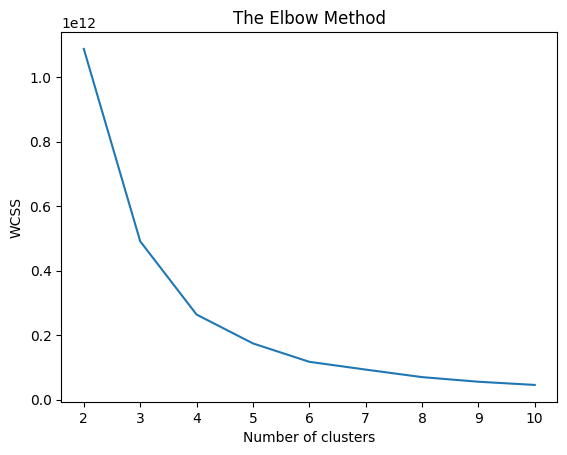

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters k-means

In [ ]:
import warnings
xn_clusters = 6

warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = xn_clusters, init = "k-means++", random_state = 42).fit(data)
data['cluster'] = kmeans.labels_
data.tail()


,cases,deaths,cluster
61895,0,0,4
61896,0,1,4
61897,0,0,4
61898,1,0,4
61899,1,0,4


In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['cases', 'deaths'])
centers['freq'] = data['cluster'].value_counts()
centers['freq_r'] = data['cluster'].value_counts(normalize=True)
print(centers)

           cases       deaths   freq    freq_r
0    6860.092615   202.023664   2444  0.039483
1   48655.214545   818.090909    275  0.004443
2  183237.636364  1812.181818     33  0.000533
3   24194.200692   582.937716    578  0.009338
4     240.868938     6.970467  58483  0.944798
5   82680.471264  1015.551724     87  0.001405


## Visualización clusters con dos variables

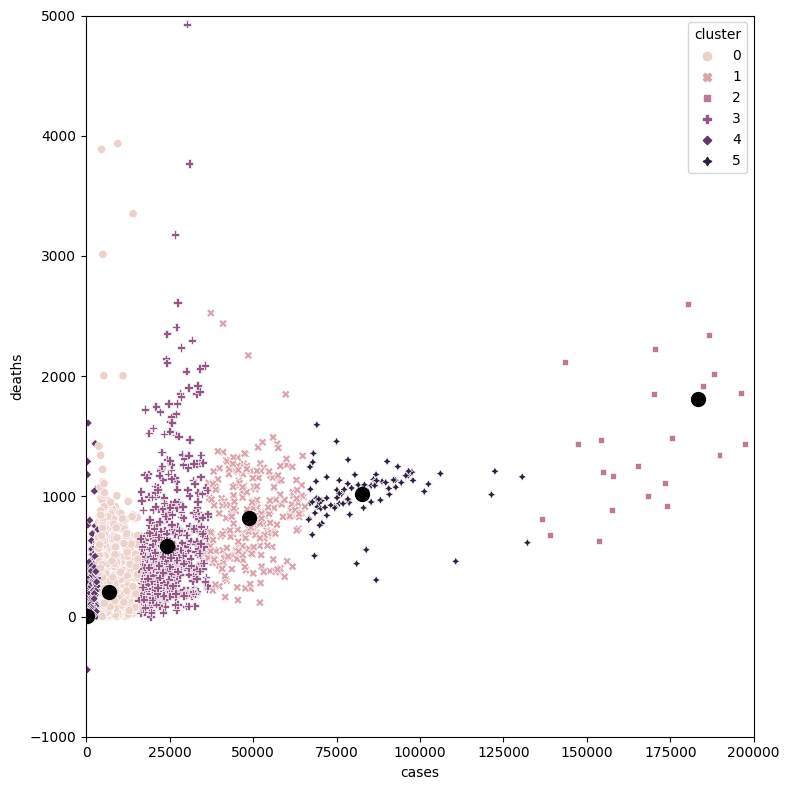

In [ ]:
import seaborn as sns 
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.scatterplot(x=columna1, y=columna2, hue='cluster', style='cluster', 
                     ax=ax, data=data)
ax.set_xlim(-100, 200000)
ax.set_ylim(-1000, 5000)
centers.plot.scatter(x=columna1, y=columna2, ax=ax, s=100, color='black')
plt.tight_layout()
plt.show()

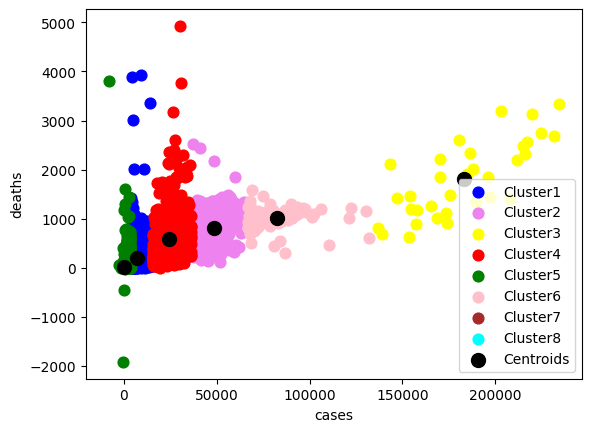

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data[data['cluster']==0][columna1], data[data['cluster']==0][columna2], s = 60, c = 'blue', label = 'Cluster1')
plt.scatter(data[data['cluster']==1][columna1], data[data['cluster']==1][columna2], s = 60, c = 'violet', label = 'Cluster2')
plt.scatter(data[data['cluster']==2][columna1], data[data['cluster']==2][columna2], s = 60, c = 'yellow', label = 'Cluster3')
plt.scatter(data[data['cluster']==3][columna1], data[data['cluster']==3][columna2], s = 60, c = 'red', label = 'Cluster4')
plt.scatter(data[data['cluster']==4][columna1], data[data['cluster']==4][columna2], s = 60, c = 'green', label = 'Cluster5') 
plt.scatter(data[data['cluster']==5][columna1], data[data['cluster']==5][columna2], s = 60, c = 'pink', label = 'Cluster6') 
plt.scatter(data[data['cluster']==6][columna1], data[data['cluster']==6][columna2], s = 60, c = 'brown', label = 'Cluster7') 
plt.scatter(data[data['cluster']==7][columna1], data[data['cluster']==7][columna2], s = 60, c = 'cyan', label = 'Cluster8') 
plt.scatter(centers[columna1], centers[columna2], s = 100, c = 'black', label = 'Centroids')
plt.xlabel(columna1) 
plt.ylabel(columna2) 
plt.legend()             
plt.show()

## DEL PROFE

## Caracterización de los clusters

Debemos caracterizar los clusters:

+ Cluster 1:Cliente estándar.
+ Cluster 2:Cliente cuidadoso-cliente potencial.
+ Cluster 3:Cliente sensible-de cuidado.
+ Cluster 4:Cliente descuidado-riesgoso.
+ Cluster 5:Cliente objetivo.

# K-means con todas las variables

In [ ]:
# preprocessing
data1 = df_starup[['Annual Income (k$)','Spending Score (1-100)', 'Age']]
data1['Gender_M'] = (df_starup['Gender'] == 'Male')*1.0
data1.reset_index(drop=True, inplace=True)
data1.head()

,Annual Income (k$),Spending Score (1-100),Age,Gender_M
0,15,39,19,1.0
1,15,81,21,1.0
2,16,6,20,0.0
3,16,77,23,0.0
4,17,40,31,0.0


## Elbow Method

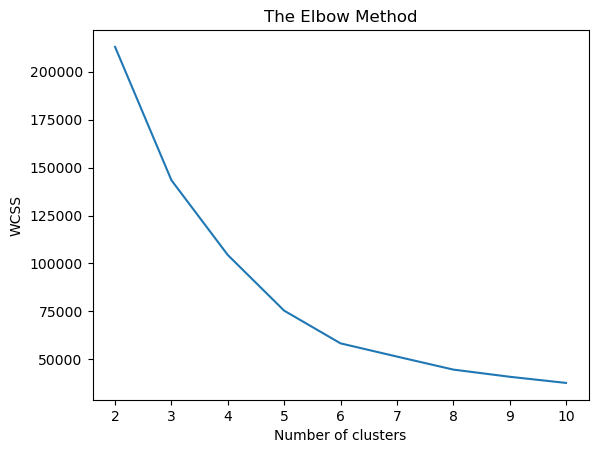

In [ ]:
from sklearn.cluster import KMeans
data_km=data1.copy()
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data_km)
    wcss.append(kmeans.inertia_)


    
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters

In [ ]:
import warnings
warnings.filterwarnings('ignore')
kmeans1 = KMeans(n_clusters = 6, init = "k-means++", random_state = 42).fit(data_km)
data_km['cluster'] = kmeans1.labels_

centers1 = pd.DataFrame(kmeans1.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender_M'])

centers1['freq']=data_km['cluster'].value_counts()
centers1['freq_r']=data_km['cluster'].value_counts(normalize=True)
centers1

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,freq,freq_r
0,86.538462,82.128205,32.692308,0.461538,39,0.195
1,53.377778,49.088889,56.155556,0.444444,45,0.225
2,25.727273,79.363636,25.272727,0.409091,22,0.110
3,88.228571,17.285714,41.685714,0.571429,35,0.175
4,56.657895,49.131579,27.000000,0.342105,38,0.190
5,25.142857,19.523810,44.142857,0.380952,21,0.105


## Clusters con data transformada (StandardScale)
## K-means

In [ ]:
from sklearn import preprocessing
data_sd = preprocessing.scale(data1)
data_sd = pd.DataFrame(data_sd, columns = ['Annual Income (k$)_s', 'Spending Score (1-100)_s', 'Age_s', 'Gender_M_s'])
data_sd.head()

,Annual Income (k$)_s,Spending Score (1-100)_s,Age_s,Gender_M_s
0,-1.738999,-0.434801,-1.424569,1.128152
1,-1.738999,1.195704,-1.281035,1.128152
2,-1.700830,-1.715913,-1.352802,-0.886405
3,-1.700830,1.040418,-1.137502,-0.886405
4,-1.662660,-0.395980,-0.563369,-0.886405


## Elbow Method

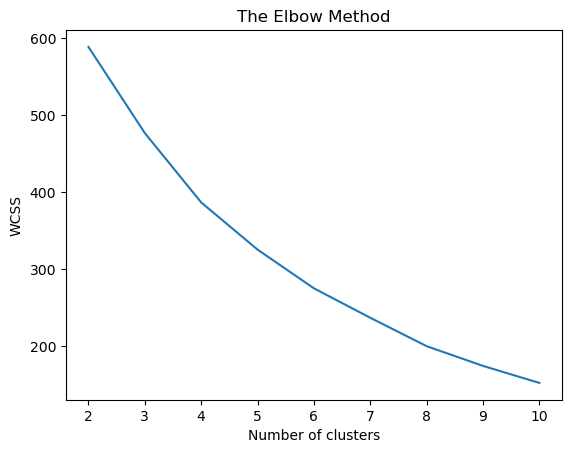

In [ ]:
data_sd_km=data_sd.copy() 
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(data_sd_km)
    wcss.append(kmeans.inertia_)

  
import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Definición de clusters data escalada

In [ ]:
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 8, init = "k-means++", random_state = 42).fit(data_sd)
data_sd_km['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)_s', 'Spending Score (1-100)_s', 'Age_s', 'Gender_M_s'])
centers2['freq']=data_sd_km['cluster'].value_counts()
centers2['freq_r']=data_sd_km['cluster'].value_counts(normalize=True)
print(centers2)

   Annual Income (k$)_s  Spending Score (1-100)_s     Age_s  Gender_M_s  freq  \
0             -0.493545                 -0.440553  1.376990    1.128152    27   
1              0.943271                  1.179823 -0.452456   -0.886405    22   
2             -0.737052                  0.416038 -0.976027    1.128152    24   
3              0.997749                 -0.960834  0.157887   -0.886405    20   
4              0.967012                 -1.397168 -0.027007    1.128152    19   
5             -0.528180                 -0.367942  0.891900   -0.886405    36   
6             -0.802726                  0.361041 -0.922202   -0.886405    34   
7              1.013441                  1.260407 -0.399900    1.128152    18   

   freq_r  
0   0.135  
1   0.110  
2   0.120  
3   0.100  
4   0.095  
5   0.180  
6   0.170  
7   0.090  


## Definición de clusters con data en unidades reales

In [ ]:
mu =data1.mean()
sd=data1.std()
centers_inv = pd.DataFrame(columns = centers1.columns)
centers_inv['Annual Income (k$)']=centers2['Annual Income (k$)_s']*sd['Annual Income (k$)']+mu['Annual Income (k$)']
centers_inv['Spending Score (1-100)']=centers2['Spending Score (1-100)_s']*sd['Spending Score (1-100)']+mu['Spending Score (1-100)']
centers_inv['Age']=centers2['Age_s']*sd['Age']+mu['Age']
centers_inv['Gender_M']=centers2['Gender_M_s']*sd['Gender_M']+mu['Gender_M']
centers_inv['freq']=centers2['freq']
centers_inv['freq_r']=centers2['freq_r']
centers_inv

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,freq,freq_r
0,47.597182,38.823375,58.085185,1.001405,27,0.135
1,85.334742,80.667172,32.529634,-0.001104,22,0.110
2,41.201543,60.943559,25.215872,1.001405,24,0.120
3,86.765596,25.387892,41.055521,-0.001104,20,0.100
4,85.958312,14.120214,38.472740,1.001405,19,0.095
5,46.687498,40.698439,51.308964,-0.001104,36,0.180
6,39.476637,59.523338,25.967754,-0.001104,34,0.170
7,87.177739,82.748139,33.263795,1.001405,18,0.090


In [ ]:
data2=data1.copy()
data2['cluster']=data_sd_km['cluster']
Centers_mean=data2.groupby('cluster').mean()
Centers_mean

,Annual Income (k$),Spending Score (1-100),Age,Gender_M
cluster,,,,
0,47.629630,38.851852,58.037037,1.0
1,85.272727,80.590909,32.545455,0.0
2,41.250000,60.916667,25.250000,1.0
3,86.700000,25.450000,41.050000,0.0
4,85.894737,14.210526,38.473684,1.0
5,46.722222,40.722222,51.277778,0.0
6,39.529412,59.500000,26.000000,0.0
7,87.111111,82.666667,33.277778,1.0


## Evaluación. Silhouette score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
data2['S_S'] = silhouette_samples(data_sd_km,data_sd_km['cluster'])
silhouette_score_mean = silhouette_score(data_sd_km,data_sd_km['cluster'])
print(silhouette_score_mean)

0.5453547636797776


In [ ]:
Centers_mean=data2.groupby('cluster').mean()
Centers_mean['freq']=data2['cluster'].value_counts()
Centers_mean['freq_r']=data2['cluster'].value_counts(normalize=True)
Centers_mean

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,S_S,freq,freq_r
cluster,,,,,,,
0,47.629630,38.851852,58.037037,1.0,0.586699,27,0.135
1,85.272727,80.590909,32.545455,0.0,0.711400,22,0.110
2,41.250000,60.916667,25.250000,1.0,0.563596,24,0.120
3,86.700000,25.450000,41.050000,0.0,0.484337,20,0.100
4,85.894737,14.210526,38.473684,1.0,0.477416,19,0.095
5,46.722222,40.722222,51.277778,0.0,0.490390,36,0.180
6,39.529412,59.500000,26.000000,0.0,0.461917,34,0.170
7,87.111111,82.666667,33.277778,1.0,0.663117,18,0.090


# Cluster Jerárquico

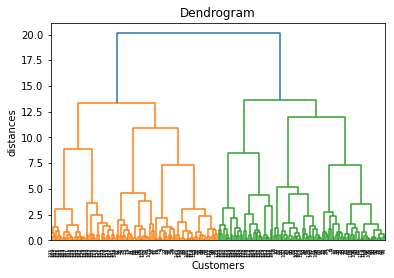

In [ ]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
data_sdh=data_sd.copy()
data_sdh1=data_sd.copy()
data1h=data1.copy()
dendrogram = sch.dendrogram(sch.linkage(data_sdh, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

## Definición de clusters y evaluación

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(data_sdh)
data1h['cluster_hc']=y_hc
data_sdh1['cluster_hc']=y_hc
data1h['S_S_hc'] = silhouette_samples(data_sdh1,data_sdh1['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(data_sdh1,data_sdh1['cluster_hc'])
print(silhouette_score_mean_hc)

0.4941236222686629


In [ ]:
Centers_mean_hc=data1h.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=data1h['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=data1h['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,
0,46.526316,58.552632,27.105263,0.0,0.438005,38,0.190
1,44.105263,39.657895,49.789474,0.0,0.418860,38,0.190
2,39.217391,59.652174,24.565217,1.0,0.526353,23,0.115
3,86.388889,11.666667,38.833333,1.0,0.437881,18,0.090
4,50.034483,41.344828,56.551724,1.0,0.475323,29,0.145
5,87.111111,82.666667,33.277778,1.0,0.550082,18,0.090
6,86.047619,81.666667,32.190476,0.0,0.666464,21,0.105
7,92.333333,21.600000,44.600000,0.0,0.572951,15,0.075


# DBSCAN
![image.png](attachment:image.png)
## Definición de clusters y evaluación

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
#pip install hdbscan
from sklearn.cluster import DBSCAN
data_sd_db=data_sd.copy()
data1_db=data1.copy()
dbscan = DBSCAN(eps=0.75, min_samples=5).fit(data_sd_db)
#y_dbs = dbscan.fit_predict(data_sd_db)
y_dbs = dbscan.labels_
data_sd_db['cluster_dbs']=y_dbs
silhouette_score(data_sd_db, data_sd_db['cluster_dbs'])

0.4040925347546269

In [ ]:
data1_db['cluster_dbs']=y_dbs
data1_db['S_S_dbs'] = silhouette_samples(data_sd_db,data_sd_db['cluster_dbs'])
silhouette_score_mean_hc = silhouette_score(data_sd_db,data_sd_db['cluster_dbs'])
Centers_mean_dbs=data1_db.groupby('cluster_dbs').mean()
Centers_mean_dbs['freq_dbs']=data1_db['cluster_dbs'].value_counts()
Centers_mean_dbs['freq_r_dbs']=data1_db['cluster_dbs'].value_counts(normalize=True)
Centers_mean_dbs
#Noisy samples are given the label -1.

,Annual Income (k$),Spending Score (1-100),Age,Gender_M,S_S_dbs,freq_dbs,freq_r_dbs
cluster_dbs,,,,,,,
-1,59.000000,28.923077,37.961538,0.692308,-0.017411,26,0.130
0,56.706522,56.717391,37.391304,0.000000,0.350240,92,0.460
1,24.875000,75.875000,25.875000,1.000000,0.690620,8,0.040
2,54.000000,46.960000,55.840000,1.000000,0.544660,25,0.125
3,55.545455,53.272727,22.636364,1.000000,0.677924,11,0.055
4,81.562500,83.187500,33.562500,1.000000,0.569660,16,0.080
5,83.600000,12.700000,43.300000,1.000000,0.650301,10,0.050
6,88.333333,20.416667,43.416667,0.000000,0.569408,12,0.060


## REFERENCIAS

*  https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data/
*  http://apps.who.int/gho/data/node.home
*